# Import Statements and Data Importing

In [ ]:
#Import statements
import pandas as pd

!pip install opendatasets

import opendatasets as od

import numpy as np

import scipy.stats as stats

import statsmodels.stats.api as smapi

import statsmodels.stats.diagnostic as smdog

import statsmodels.api as sm

import matplotlib as plt

In [ ]:
#download Fifa world cup file from kaggle
#NOTE: you need your kaggle username and key for this step

#username: derekreeves
#key:77ce5b35f51476bcb4ef56d8229a23cf
od.download('https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset/download?datasetVersionNumber=7')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: derekreeves
Your Kaggle Key: ··········


100%|██████████| 7.42k/7.42k [00:00<00:00, 2.12MB/s]

In [ ]:
# Read csv
fifa = pd.read_csv("/content/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv")
# Print dictionary head
fifa.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


# Scaffold 1 and 2 code

In [ ]:
#checking the datatype of each column
#note that date and time is not converted to a time datatype because it is not
# necessary for our analysis
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     int64 
 3   possession team2                                       64 non-null     int64 
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [ ]:
#quick clean to int for analysis
fifa['possession team1'] = fifa['possession team1'].str.replace('%', '').astype(int)
fifa['possession team2'] = fifa['possession team2'].str.replace('%', '').astype(int)

In [ ]:

def pos_finder(x):
#creates an average possession stat for the team inputted'''
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]
  a = team[team.team1 == x]['possession team1'].sum()
  b = team[team.team2 == x]['possession team2'].sum()
  return (a + b) / len(team)

In [ ]:
def throughballs(x):
#creates an average throughballs per total offers to receive stat for the team inputted'''
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]

  team.loc[team.team1 == x, 'throughball_prop_team1'] = (team.loc[team.team1 == x,'inbehind offers to receive team1']) / (team.loc[team.team1 == x, 'total offers to receive team1'])
  team.loc[team.team2 == x, 'throughball_prop_team2'] = (team.loc[team.team2 == x, 'inbehind offers to receive team2']) / (team.loc[team.team2 == x, 'total offers to receive team2'])
  a = team['throughball_prop_team1'].sum()
  b = team['throughball_prop_team2'].sum()
  return (a + b) / len(team)

In [ ]:
def def_breaks(x):
#creates a stat for total defensive line breaks per total line breaks (attemped or not)'''
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]

  team.loc[team.team1 == x, 'linebreaks_prop_team1'] = (team.loc[team.team1 == x,'completed defensive line breaksteam1']) / (team.loc[team.team1 == x, 'attempted defensive line breaks team1'])
  team.loc[team.team2 == x, 'linebreaks_prop_team2'] = (team.loc[team.team2 == x, 'completed defensive line breaks team2']) / (team.loc[team.team2 == x, 'attempted defensive line breaks team2'])
  a = team['linebreaks_prop_team1'].sum()
  b = team['linebreaks_prop_team2'].sum()
  return (a + b) / len(team)

In [ ]:
def passes_completed(x):
#creates an average possession stat for the team inputted'''
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]
  a = team[team.team1 == x]['passes completed team1'].sum()
  b = team[team.team2 == x]['passes completed team2'].sum()
  return (a + b) / len(team)

In [ ]:
def total_gd(x):
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]
  a = team[team.team1 == x]['number of goals team1'].sum()
  b = team[team.team2 == x]['number of goals team2'].sum()
  c = team[team.team1 == x]['conceded team1'].sum()
  d = team[team.team2 == x]['conceded team2'].sum()
  return (a + b) - (c + d)
#total goal difference

In [ ]:
def line_breaks(x):
#number of times a team breaks their opponent's defensive structure per game on average
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]
  a = team[team.team1 == x]['attempted line breaks team1'].sum()
  b = team[team.team2 == x]['attempted line breaks team2'].sum()
  return (a + b) / len(team)

In [ ]:
def defensive_pressures(x):
#number of defensive pressures applied per game on average
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]
  a = team[team.team1 == x]['defensive pressures applied team1'].sum()
  b = team[team.team2 == x]['defensive pressures applied team2'].sum()
  return (a + b) / len(team)

In [ ]:
def crosses(x):
#number of crosses per game on average
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]
  team.loc[team.team1 == x, 'crosses_prop_team1'] = (team.loc[team.team1 == x,'crosses team1']) / (team.loc[team.team1 == x, 'passes team1'])
  team.loc[team.team2 == x, 'crosses_prop_team2'] = (team.loc[team.team2 == x, 'crosses team2']) / (team.loc[team.team2 == x, 'passes team2'])
  a = team['crosses_prop_team1'].sum()
  b = team['crosses_prop_team2'].sum()
  return (a + b) / len(team)

In [ ]:
def switches(x):
#number of switches of play per game on average
  team = fifa[(fifa.team1 == x) | (fifa.team2 == x)]
  a = team[team.team1 == x]['switches of play completed team1'].sum()
  b = team[team.team2 == x]['switches of play completed team2'].sum()
  return (a + b) / len(team)

In [ ]:
#creates new fifa_teams dataset to study teams rather than matches
temp =[]
for i in fifa.team1.unique():
  temp.append(
        {
            'Team': i,
            'Average possession per game': pos_finder(i),
            'Average throughballs per total attempted offers to receive per game': throughballs(i),
            'completed defensive line breaks per attempted defensive line break': def_breaks(i),
            'Average passes completed per game': passes_completed(i),
            'Total goal difference': total_gd(i),
            'Average attempted line breaks per game': line_breaks(i),
            'Average defensive pressures applied per game': defensive_pressures(i),
            'Average crosses per pass per game': crosses(i),
            'Average switches of play': switches(i)
        }
    )
fifa_teams = pd.DataFrame(temp)

In [ ]:
#assigns our categories based off possession
fifa_teams.loc[fifa_teams['Average possession per game'] > 50, 'Playstyle'] = 'Possession'
fifa_teams.loc[fifa_teams['Average possession per game'] <= 50, 'Playstyle'] = 'Counterattacking'

# Scaffold 3 and 4 code

 **T-Tests**

In [ ]:
#2 sample T-test to see if there is a difference in goal difference between the two playstyles
stats.ttest_ind(fifa_teams.loc[fifa_teams['Playstyle'] == 'Possession', 'Total goal difference'], fifa_teams.loc[fifa_teams['Playstyle'] == 'Counterattacking', 'Total goal difference'], nan_policy='omit')

Ttest_indResult(statistic=3.92433766622614, pvalue=0.0004699069561601322)

In [ ]:
#1 sample T-test on goal difference of possession. Comparing against null hypothesis of goal diff = 0
stats.ttest_1samp(fifa_teams.loc[fifa_teams['Playstyle'] == 'Possession', 'Total goal difference'], popmean = 0, alternative = 'two-sided', nan_policy='omit')

TtestResult(statistic=3.1999999999999993, pvalue=0.018600059024840153, df=6)

In [ ]:
#1 sample T-test on goal difference of counterattacking. Comparing against null hypothesis of goal diff = 0
stats.ttest_1samp(fifa_teams.loc[fifa_teams['Playstyle'] == 'Counterattacking', 'Total goal difference'], popmean = 0, alternative = 'two-sided', nan_policy='omit')

TtestResult(statistic=-1.8769485288138603, pvalue=0.07273447406175182, df=24)

<Axes: title={'center': 'Total goal difference'}, xlabel='Playstyle'>

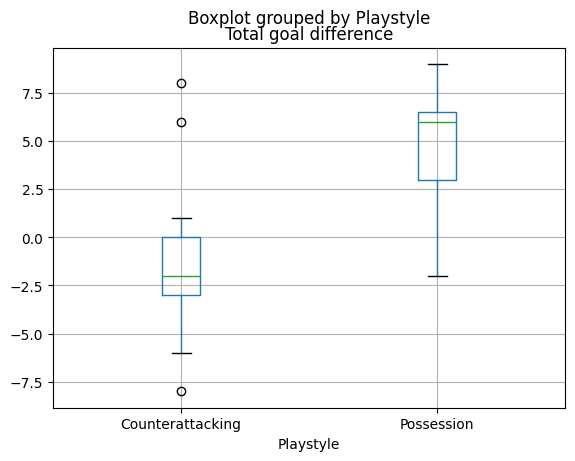

In [ ]:
#boxplot of the values of the fifa_teams dataset. From this we can find the means of the counterattacking and possession based teams that we can use in combination with the t-tests above
fifa_teams.boxplot(column = 'Total goal difference', by = 'Playstyle')

 **Assumptions Tests**

In [ ]:
#Possession data normality test (Anderson Darling)
#p value on the right
smapi.normal_ad(fifa_teams.loc[fifa_teams['Playstyle'] == 'Possession', 'Total goal difference'])

#the P value is well above .05, indicating definite normality for the goal difference distribution of the possession group

(0.40313539250676733, 0.2542253045047043)

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

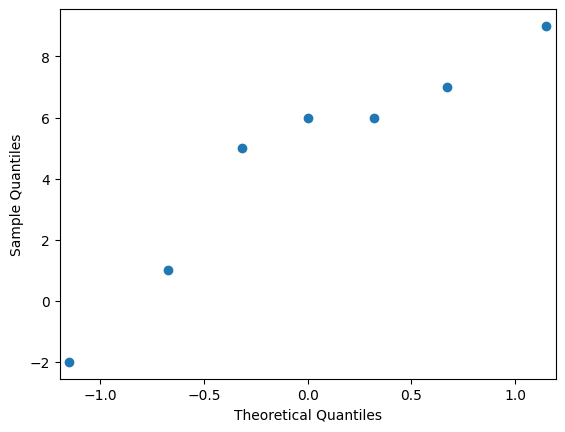

In [ ]:
#QQ plot of possession goal difference to show normality
sm.qqplot(fifa_teams.loc[fifa_teams['Playstyle'] == 'Possession', 'Total goal difference']).show

#the graph supports the Anderson-Darling test, showing that the data is normally distributed

In [ ]:
#Counterattacking data normality test (Anderson Darling)
#p value on the right
smapi.normal_ad(fifa_teams.loc[fifa_teams['Playstyle'] == 'Counterattacking', 'Total goal difference'])

#the p value is just barely above the .05 threshold, which is shows that the distribution of goal differences across counterattacking teams is only JUST normal

(0.6424475678753367, 0.0829873162868664)

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

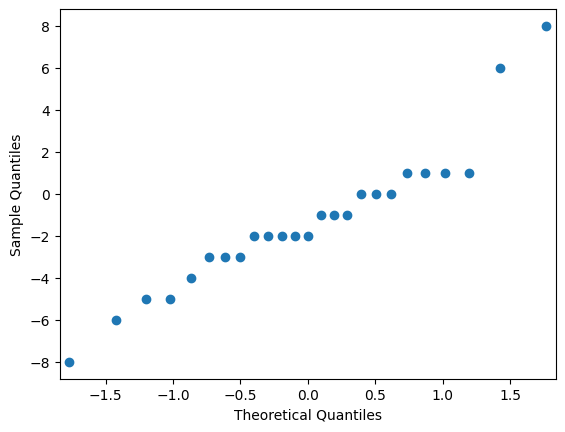

In [ ]:
#QQ plot of counterattacking goal difference to show normality
sm.qqplot(fifa_teams.loc[fifa_teams['Playstyle'] == 'Counterattacking', 'Total goal difference']).show

#this plot supports our previous assessment from the Anderson-Darling test that the data is only just barely normally distributed

In [ ]:
#Variance test

#calculates and stores the variance of total goal difference for possession teams
#The bracketed '2' at the end pulls the Standard Deviation directly from the describe function. We then square it to find the variance
var_possession = fifa_teams.loc[fifa_teams['Playstyle'] == 'Possession', 'Total goal difference'].describe()[2]**2

#does the same thing for the variance of total goal difference for counterattacking teams
var_counterattacking = fifa_teams.loc[fifa_teams['Playstyle'] == 'Counterattacking', 'Total goal difference'].describe()[2]**2

#finds the variance ratio. The ratio is not over 4 so therefore we have passed the variance test.
print(var_possession/var_counterattacking)

1.2287024901703802
